In [22]:
import pandas as pd 
import matplotlib.pyplot as pit
df = pd.read_csv('all_month (1).csv')
print("Columns in dataset:", df.columns)
df['Date'] = pd.to_datetime(df['time'])

Columns in dataset: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


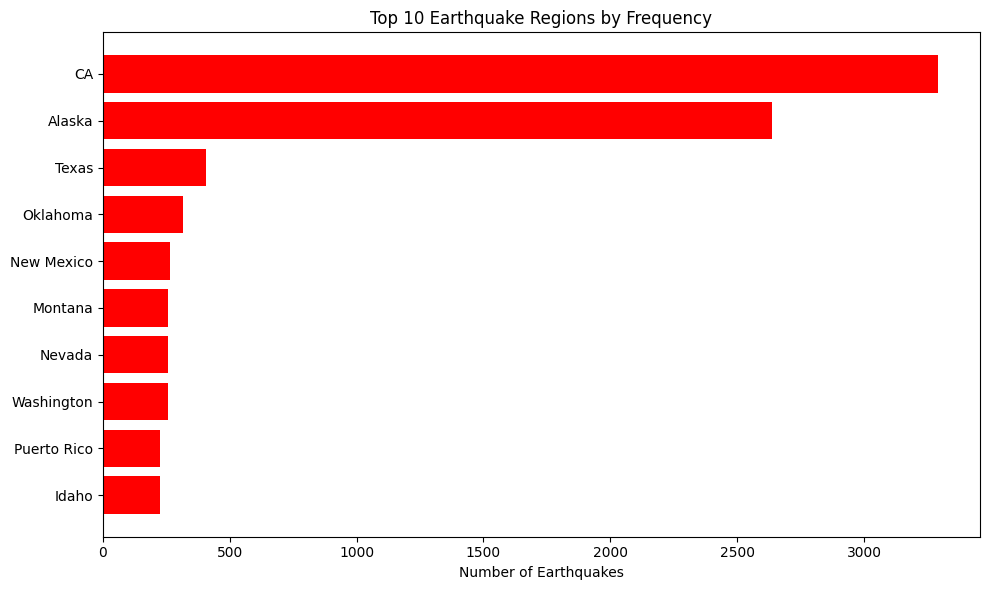

In [23]:

# ------------------------------
# 1) Bar Graph: Top 10 regions by earthquake frequency
# ------------------------------
# We'll extract the location name from the 'place' column

# Some place values contain extra details, so let's simplify by extracting the part after the comma if present
df['Region'] = df['place'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else 'Unknown')

# Count earthquakes by Region and select top 10
top_regions = df['Region'].value_counts().head(10)

pit.figure(figsize=(10,6))
pit.barh(top_regions.index[::-1], top_regions.values[::-1], color='red')
pit.xlabel('Number of Earthquakes')
pit.title('Top 10 Earthquake Regions by Frequency')
pit.tight_layout()
pit.show()

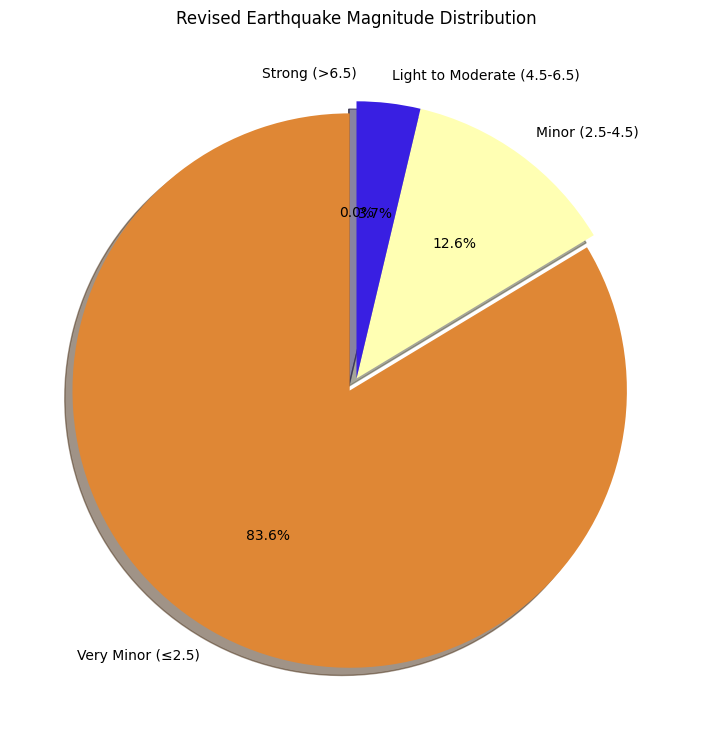

In [24]:
# ------------------------------
# 2) Pie Chart: Earthquake Magnitude Categories (Revised)
# ------------------------------
# Define updated magnitude categories with slightly different bins
bins = [0, 2.5, 4.5, 6.5, 10]
labels = ['Very Minor (≤2.5)', 'Minor (2.5-4.5)', 'Light to Moderate (4.5-6.5)', 'Strong (>6.5)']

# Assign categories based on magnitude
df['MagCategory'] = pd.cut(df['mag'], bins=bins, labels=labels, include_lowest=True)

# Count earthquakes in each category and sort by bin order
mag_counts = df['MagCategory'].value_counts().reindex(labels)

# Create explode list to slightly separate the largest slice for emphasis
explode = [0.05 if count == mag_counts.max() else 0 for count in mag_counts]

plt.figure(figsize=(9,9))
plt.pie(
    mag_counts,
    labels=mag_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    colors=["#df8735", '#ffffb3', "#391fe2", "#383332"]
)
plt.title('Revised Earthquake Magnitude Distribution')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_5428\493567230.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, patch_artist=True, labels=labels, showmeans=True)


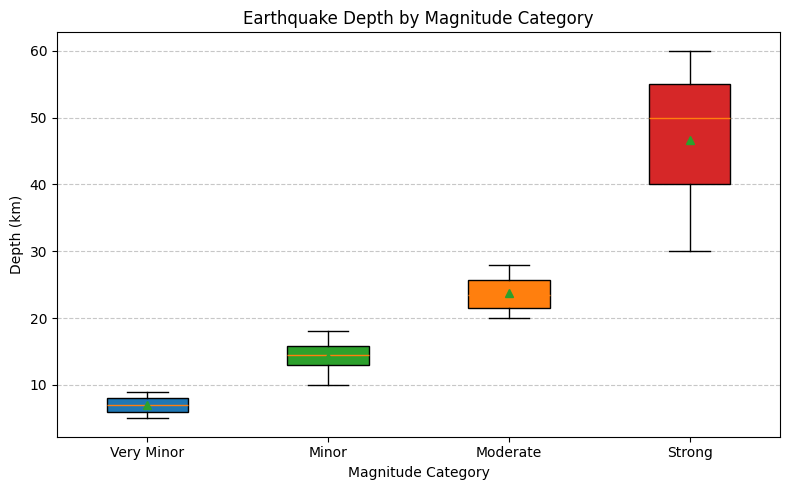

In [25]:
import matplotlib.pyplot as pit
import pandas as pd

# Sample data (replace with your full df)
df = pd.DataFrame({
    'mag': [1.2, 2.8, 3.5, 5.0, 6.8, 7.1, 4.0, 6.2, 3.1, 2.0, 8.3, 4.9, 1.7, 5.6],
    'depth': [5, 10, 15, 25, 30, 50, 18, 22, 14, 9, 60, 20, 7, 28]
})

# Define bins and labels
bins = [0, 2.5, 4.5, 6.5, 10]
labels = ['Very Minor', 'Minor', 'Moderate', 'Strong']
df['MagCategory'] = pd.cut(df['mag'], bins=bins, labels=labels, include_lowest=True)

# Prepare depth data by category
data = [df[df['MagCategory'] == label]['depth'] for label in labels]

# Plot box plot
colors = ['#1f77b4', '#2ca02c', '#ff7f0e', '#d62728']
plt.figure(figsize=(8, 5))
box = plt.boxplot(data, patch_artist=True, labels=labels, showmeans=True)

# Color each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Earthquake Depth by Magnitude Category')
plt.xlabel('Magnitude Category')
plt.ylabel('Depth (km)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Columns in dataset: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


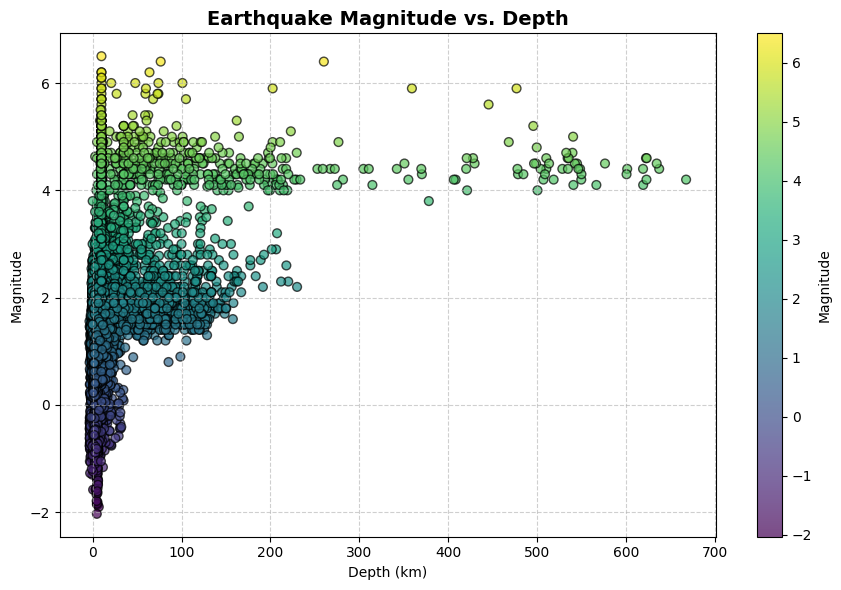

In [31]:
import pandas as pd 
import matplotlib.pyplot as pit
df = pd.read_csv('all_month (1).csv')
print("Columns in dataset:", df.columns)
df['Date'] = pd.to_datetime(df['time'])


import matplotlib.pyplot as plt

# Scatter Plot: Depth vs Magnitude
plt.figure(figsize=(9, 6))
sc = plt.scatter(df['depth'], df['mag'], c=df['mag'], cmap='viridis', s=40, alpha=0.7, edgecolor='k')

plt.colorbar(sc, label='Magnitude')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.title('Earthquake Magnitude vs. Depth', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Columns in dataset: Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')


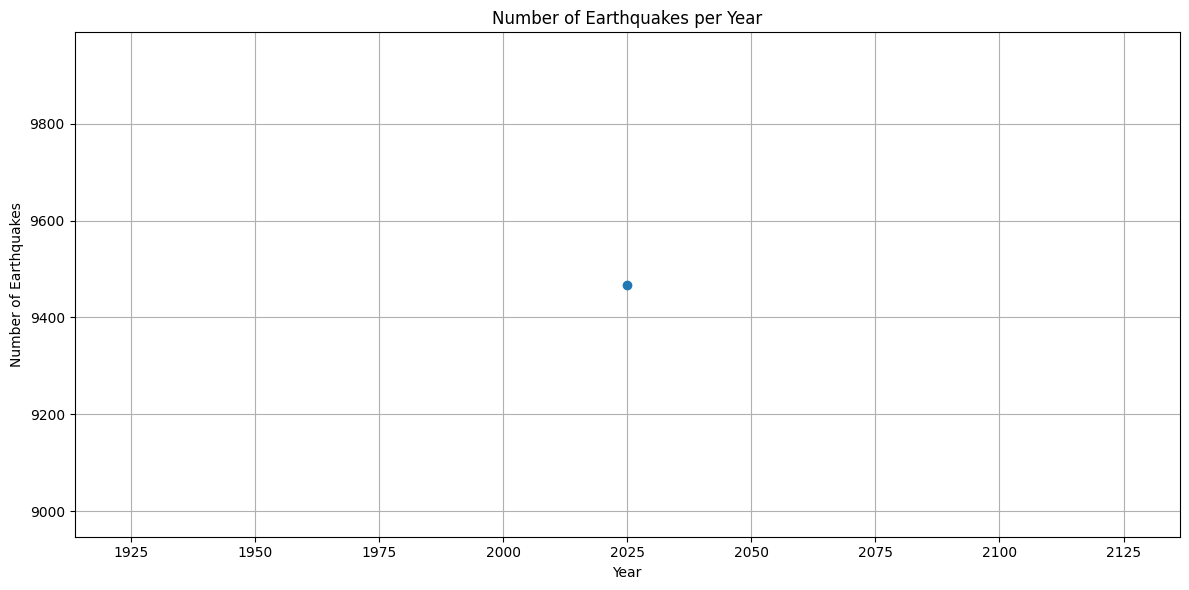

In [30]:
import pandas as pd 
import matplotlib.pyplot as pit
df = pd.read_csv('all_month (1).csv')
print("Columns in dataset:", df.columns)
df['Date'] = pd.to_datetime(df['time'])

# ------------------------------
# 4) Line Chart: Number of earthquakes per year
# ------------------------------
# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Count earthquakes per year
yearly_counts = df.groupby('Year').size()

plt.figure(figsize=(12,6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.title('Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.tight_layout()
plt.show()